# Lab 02 Tasks

The dataset used for this is a **character network**, representing the relationships between characters in George R. R. Martin's book *A Storm of Swords*, the third novel in his series *A Song of Ice and Fire*. The strength of the relationships between characters are calculated based on how many times two characters' names appeared within 15 words of one another in the book. 

This data was originally compiled by A. Beveridge and J. Shan. See [here](http://mlg.ucd.ie/modules/COMP30850/network_of_thrones.pdf) for more details on this network.

### Task 1

Load the network from the GEXF file game-of-thrones.gexf, and examine the following aspects of the network:

- What type of network is this?
- How many nodes and edges are in the network?
- What are the identifiers of the node in the network?
- How connected is the network?

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
g = nx.read_gexf("game-of-thrones.gexf")
g.is_directed() # type of network

False

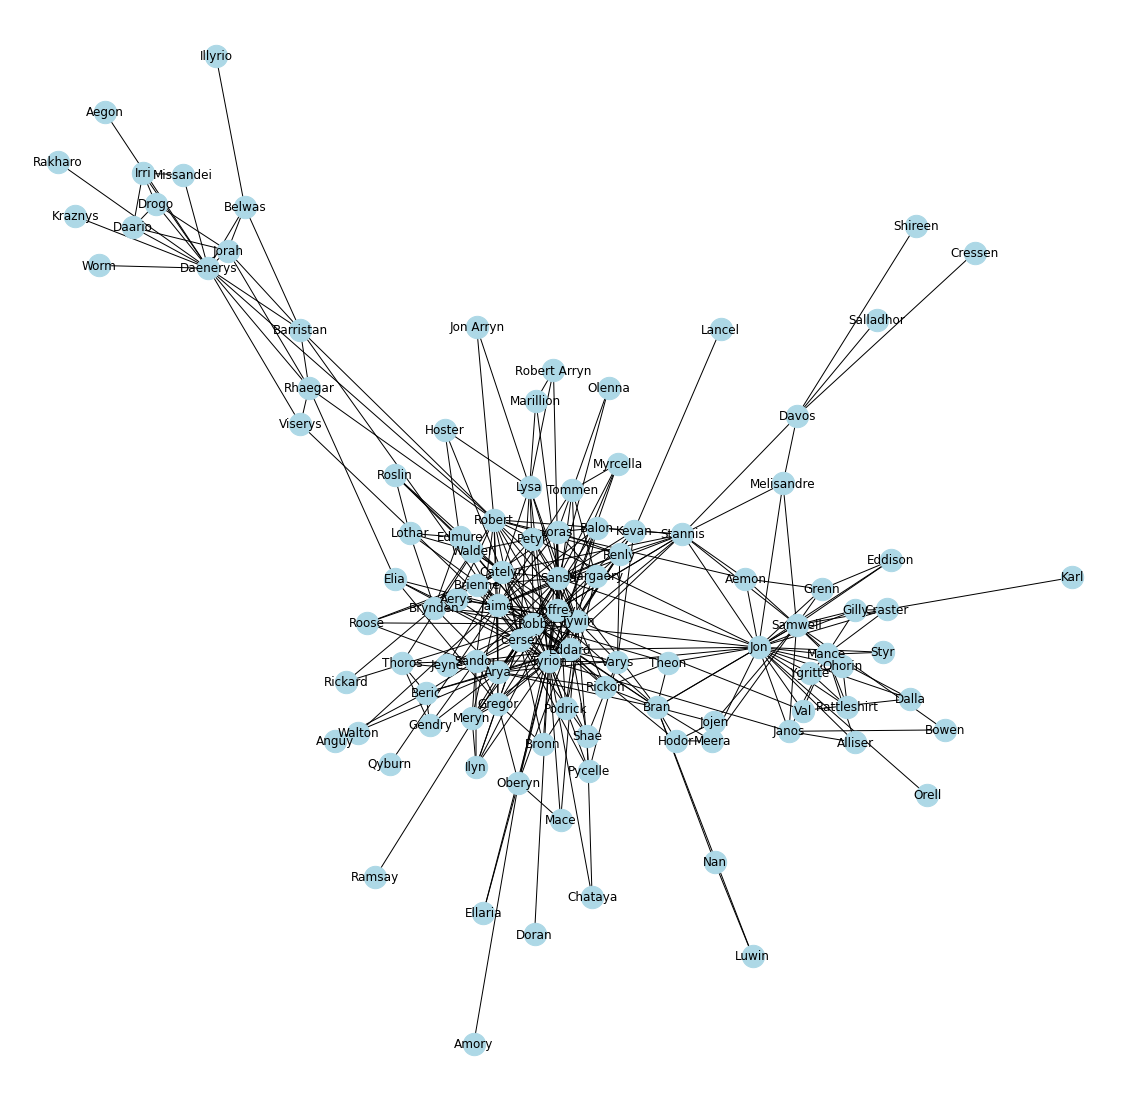

In [3]:
plt.figure(figsize=(20,20))
nx.draw_networkx(g, with_labels=True, node_size=500, node_color="lightblue")
plt.axis("off")
plt.show()

In [4]:
g.number_of_nodes(), g.number_of_edges()

(107, 352)

In [5]:
list(g.nodes())

['Aemon',
 'Grenn',
 'Samwell',
 'Aerys',
 'Jaime',
 'Robert',
 'Tyrion',
 'Tywin',
 'Alliser',
 'Mance',
 'Amory',
 'Oberyn',
 'Arya',
 'Anguy',
 'Beric',
 'Bran',
 'Brynden',
 'Cersei',
 'Gendry',
 'Gregor',
 'Joffrey',
 'Jon',
 'Rickon',
 'Roose',
 'Sandor',
 'Thoros',
 'Balon',
 'Loras',
 'Belwas',
 'Barristan',
 'Illyrio',
 'Hodor',
 'Jojen',
 'Luwin',
 'Meera',
 'Nan',
 'Theon',
 'Brienne',
 'Bronn',
 'Podrick',
 'Lothar',
 'Walder',
 'Catelyn',
 'Edmure',
 'Hoster',
 'Jeyne',
 'Lysa',
 'Petyr',
 'Robb',
 'Roslin',
 'Sansa',
 'Stannis',
 'Elia',
 'Ilyn',
 'Meryn',
 'Pycelle',
 'Shae',
 'Varys',
 'Craster',
 'Karl',
 'Daario',
 'Drogo',
 'Irri',
 'Daenerys',
 'Aegon',
 'Jorah',
 'Kraznys',
 'Missandei',
 'Rakharo',
 'Rhaegar',
 'Viserys',
 'Worm',
 'Davos',
 'Cressen',
 'Salladhor',
 'Eddard',
 'Eddison',
 'Gilly',
 'Qyburn',
 'Renly',
 'Tommen',
 'Janos',
 'Bowen',
 'Kevan',
 'Margaery',
 'Myrcella',
 'Dalla',
 'Melisandre',
 'Orell',
 'Qhorin',
 'Rattleshirt',
 'Styr',
 'Val',
 

In [6]:
# level of connectivity within a network:
nx.density(g)

0.062070181625815554

In [7]:
# is there a path between every node:
nx.is_connected(g)

True

In [28]:
nx.number_connected_components(g)

1

### Task 2

Based on the edge weights in the network, perform the following:

- Plot the edge weight distribution for the network.
- Identify the top 10 pairs of characters with the strongest associations (i.e. highest edge weights).

In [8]:
# convert the edges in the network to a Pandas DataFrame
df = nx.to_pandas_edgelist(g)
df.head(10)

,source,target,id,weight
0,Aemon,Grenn,0,5.0
1,Aemon,Samwell,1,31.0
2,Aemon,Jon,154,30.0
3,Aemon,Robert,245,4.0
4,Aemon,Stannis,292,4.0
5,Grenn,Eddison,106,8.0
6,Grenn,Jon,160,25.0
7,Grenn,Samwell,256,43.0
8,Samwell,Bran,37,11.0
9,Samwell,Jojen,153,11.0


In [9]:
# sort the rows by weight (i.e interaction frequency)
df.sort_values(by="weight", ascending=False).head(10)

,source,target,id,weight
153,Bran,Hodor,30,96.0
31,Jaime,Brienne,124,88.0
70,Tyrion,Sansa,288,77.0
118,Mance,Jon,162,69.0
66,Tyrion,Joffrey,151,54.0
220,Jon,Ygritte,174,54.0
157,Bran,Meera,34,54.0
10,Samwell,Jon,169,52.0
329,Daenerys,Jorah,84,47.0
65,Tyrion,Cersei,73,46.0


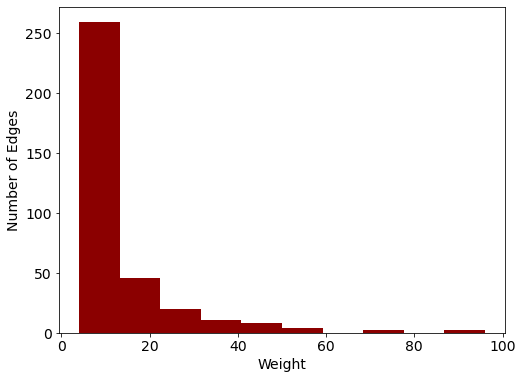

In [10]:
ax = df.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="darkred")
ax.set_ylabel("Number of Edges", fontsize=14)
ax.set_xlabel("Weight", fontsize=14);

### Task 3

Create a new unweighted version of the network, where only edges with weights >= 15 from the original network are preserved (i.e. pairs of characters must be mentioned together at least 15 times). Exclude nodes which do not have any remaining edges in the new network.

For this new unweighted network:

- Identify the number of nodes and edges
- Identify the number of connected components
- Draw a simple network diagram of the full network
- Draw a simple network diagram of only the largest component

In [14]:
g_weight = nx.Graph()

In [16]:
for n1, n2, d in g.edges(data=True):
    if d["weight"] >= 15:
        g_weight.add_edge(n1, n2)

In [17]:
g_weight.number_of_nodes(), g_weight.number_of_edges()

(61, 86)

In [18]:
nx.number_connected_components(g_weight)

3

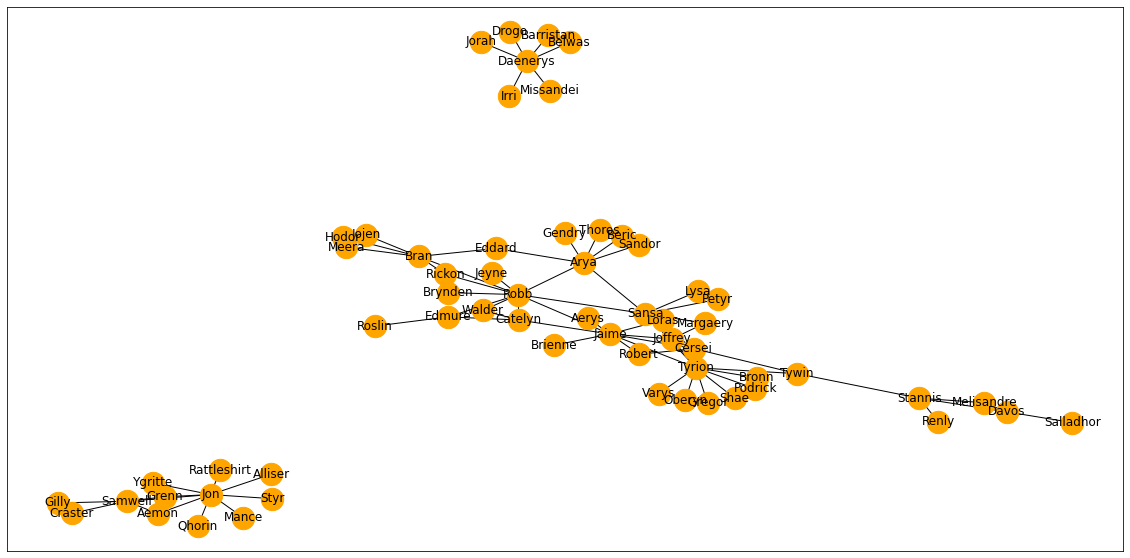

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
nx.draw_networkx(g_weight, with_labels=True, node_size=500, node_color="orange", ax=ax)

In [29]:
# get a sorted list of nodes in each of the network's components
comp_nodes = sorted(nx.connected_components(g_weight), key=len, reverse=True)
largest_comp_nodes = comp_nodes[0] # the largest one is the first component
len(largest_comp_nodes)

42

In [30]:
# get the actual subgraph for the largest component
sg = nx.subgraph(g_weight, largest_comp_nodes)

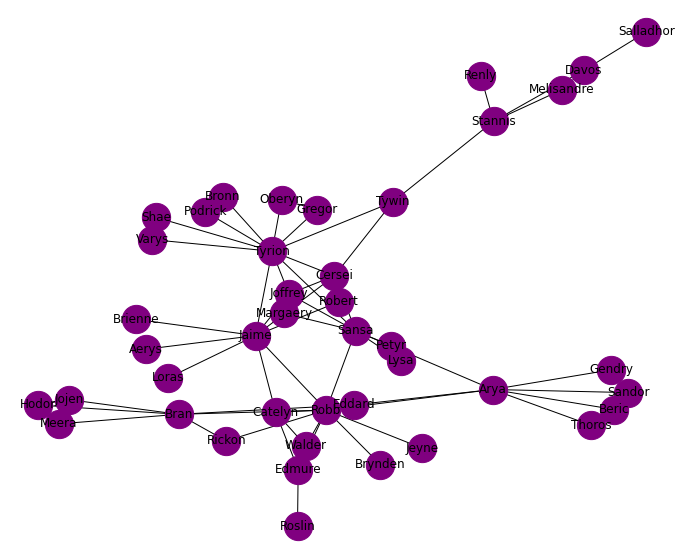

In [31]:
# draw a simple network diagram of only the largest component:
plt.figure(figsize=(12,10))
nx.draw_networkx(sg, with_labels=True, node_size=800, node_color="pink")
plt.axis("off")
plt.show()